# Random Number Generator and Random Walks

by Lars Schuster    February 2023

## Random Number Generator
Random numbers play an essential role in every computer. 
Since they are used to encrypt data and therefore ensure security of the system, a good random number generator is essential.
It is however quite difficult to "create" randomness. True randomnes can be found in Quantum-processes.
However since Quantum Computing is not (yet) wide-spread, other technologies have to suffice for now.
In this project I will look at different pseudo-random number generators.
They produce numbers that appear random since the pattern used to create them cannot easily be reconstructed.

The first example would be the linear congruent generator.

$I_{i+1} = (aI_i + c) mod\ m $

It generates a number based on its predecessor. For it to be a good random number generator the distribution of numbers must be uniform and the period of repetition should be very long. This is only be achieved by certain values for the parameters $a$, $c$ and $m$.

In [83]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The class Lin_con_gen will allow to make random number generators with the previously given formular. The seed is herby the first random number.

In [84]:
class Lin_con_gen:
    def __init__(self,a:int,c:int,m:int,seed:int):
        self.a = a
        self.c = c
        self.m = m
        self.I = (seed % m)
    def number(self):
        self.I = (self.a*self.I + self.c) % self.m
        return self.I 
    def norm_number(self):
        return self.number()/self.m
    def sequence(self,n:int):
        return np.array([self.norm_number() for i in range(n)])

test = Lin_con_gen(pow(2,32),1, 22513247,1)

The random number generator can generate whole numbers in the range of the 0 to the m value. However it is more useful to normalize the numbers to the interval from 0 to 1 as one can transform these numbers to many different distributions. The generator is initiated with a good combination of values.

In [85]:
test.norm_number()

0.7751155131021304

A quick check of a random generator can be to plot a random number as a function of its predecessor. If this plots shows any patterns the random numbers are predictable. 

Text(0, 0.5, '$r_{2i+1}$')

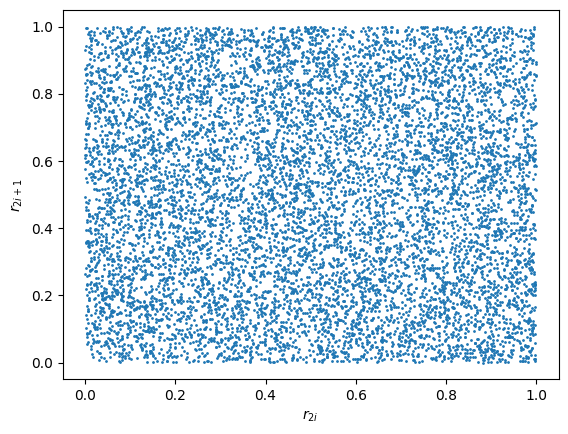

In [86]:
n= 10000

x = np.zeros(n)
y = np.zeros(n)

for i in range(n):
    x[i] = test.norm_number()
    y[i] = test.norm_number()

plt.scatter(x,y,s=1)
plt.xlabel('$r_{2i}$')
plt.ylabel('$r_{2i+1}$')

Looking at the plot one can see no obvious pattern. We can compare this to the implemented random number generator of random.

Text(0, 0.5, '$r_{2i+1}$')

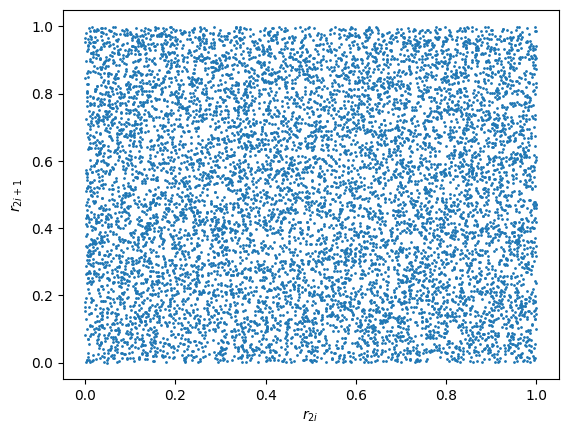

In [87]:
x_ran = np.zeros(n)
y_ran = np.zeros(n)

for i in range(n):
    x_ran[i] = random.random()
    y_ran[i] = random.random()

plt.scatter(x_ran,y_ran,s=1)
plt.xlabel('$r_{2i}$')
plt.ylabel('$r_{2i+1}$')


The plot looks very similar filling the square in between 0 and 1 uniformly.

To test whether the distribution is uniform one can investigate on its $k$-th moment. 
The k-th moment is given by:

$\langle x^k \rangle = \frac{1}{N} \sum_{i=1}^{N} x^k $

For a uniform distribution it can be approximated by the following term.

$\frac{1}{k+1}$

The difference between this term and and the actual moment is then upperbounded by $O(\frac{1}{\sqrt{n}})$.

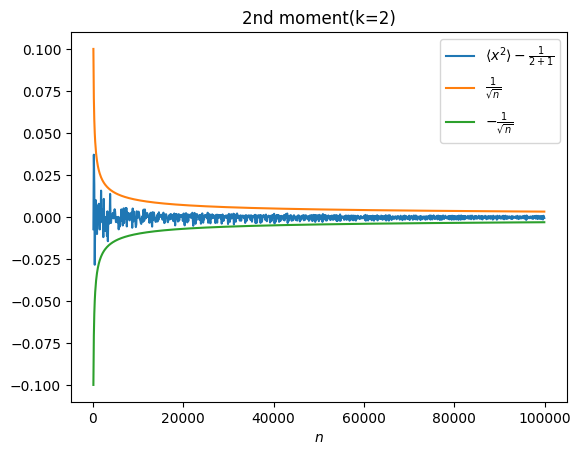

In [88]:
def moment(k:int,dist):
    return sum(dist**k)/len(dist)


k = 2
x = np.array([i*100 for i in range(1, 1000)])
y = np.array([moment(k, test.sequence(i))-1/(k+1) for i in x])
crtl = np.array([1/np.sqrt(i) for i in x])

plt.plot(x, y, label=r'$\langle x^2 \rangle -\frac{1}{2+1}$')
plt.plot(x, crtl, label=r'$\frac{1}{\sqrt{n}}$')
plt.plot(x, -crtl , label=r'$-\frac{1}{\sqrt{n}}$')
plt.xlabel('$n$')
plt.title('2nd moment(k=2)')
plt.legend()


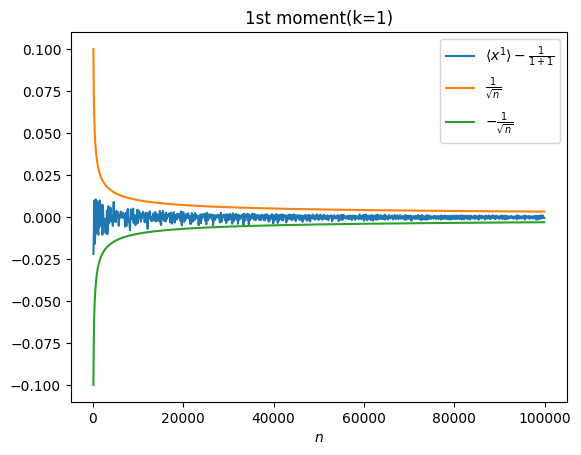

In [89]:

k = 1
x = np.array([i*100 for i in range(1, 1000)])
y = np.array([moment(k, test.sequence(i))-1/(k+1) for i in x])
crtl = np.array([1/np.sqrt(i) for i in x])

plt.plot(x, y, label=r'$\langle x^1 \rangle -\frac{1}{1+1}$')
plt.plot(x, crtl, label=r'$\frac{1}{\sqrt{n}}$')
plt.plot(x, -crtl,  label=r'$-\frac{1}{\sqrt{n}}$')
plt.xlabel('$n$')
plt.title('1st moment(k=1)')
plt.legend()


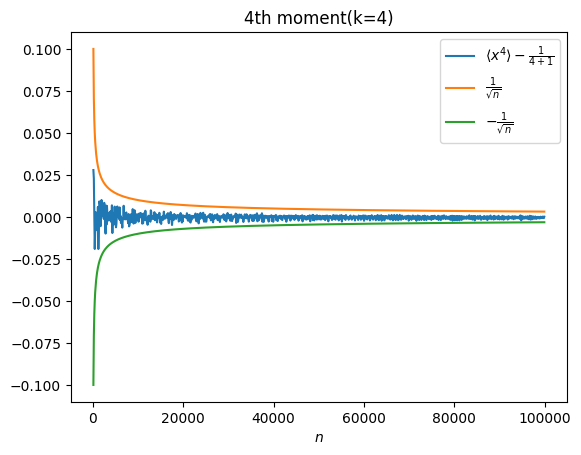

In [90]:

k = 4
x = np.array([i*100 for i in range(1, 1000)])
y = np.array([moment(k, test.sequence(i))-1/(k+1) for i in x])
crtl = np.array([1/np.sqrt(i) for i in x])

plt.plot(x, y, label=r'$\langle x^4 \rangle -\frac{1}{4+1}$')
plt.plot(x, crtl, label=r'$\frac{1}{\sqrt{n}}$')
plt.plot(x, -crtl, label=r'$-\frac{1}{\sqrt{n}}$')
plt.xlabel('$n$')
plt.title('4th moment(k=4)')
plt.legend()

From these graphs we can see that the generator is uniform as the moment is smaller than the correction term even without having to normalize it.

## Random Walks

Imagine an entity starting at some point in space. Now going forward in time discretely the entity can move in several directions each with a certain probability. After doing a step the walker again can go in the same directions and each of them have a certain probabilty again.

The easiest random walk is restricted to one dimension. The walker can either go right with probabilty p or it goes left with probabilty 1 - p.

A slightly more involved version is the so-called persistent random walker. Here we also keep track of the direction the walker is facing.(the direciton of the last step). For a walker to go the same way as before the probabilty is given by $\alpha$ and the probabilty to move in the other direction is given by $1 - \alpha$. 

Letting the walker go for 100 steps we can calculate its mean of 10000 walkers.
The initial direction is set to alternate between left and right for every new walker.

In [91]:
def persist_rand_walker(alpha:float , steps:int , inti_direct):#rigth = True
    pos = 0 
    direc = inti_direct 
    for i in range(steps):
        if random.random() > alpha:
            direc = not direc
        pos += 1 if direc else -1
    return pos

def monte_carlo(n:int,steps:int, alpha:float):
    data = np.array([persist_rand_walker(
        alpha, steps, True and 1 == (i % 2)) for i in range(n)])
    expect = np.mean(data)
    return (data,expect)

(data, mean) = monte_carlo(10000,100,0.75)

Text(0.5, 1.0, 'Histogram of random walker')

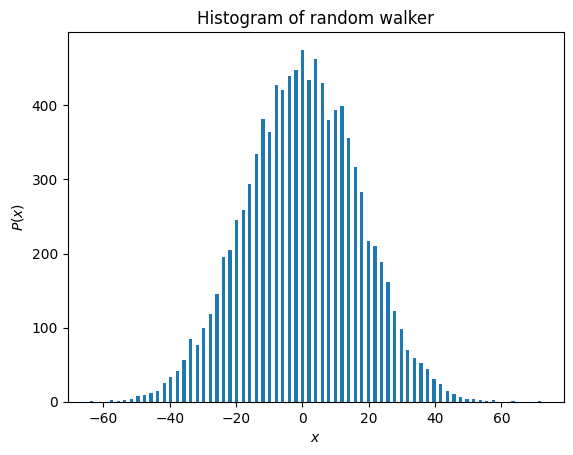

In [92]:
plt.hist(data,bins= (data.max() - data.min()) +1 )
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('Histogram of random walker')

We can plot the outcome of the random walk in a bar chart where we show number of occurences for every possible final postion of the walker. 
There are white lines in the plot because on every step the walker can only be on any odd step and the next step it can stand on all odd positions.
The graph looks like a gaussian distribution.

In [93]:
print(mean)

-0.0314


The mean $\langle x \rangle$ of all walkers is really close to 0.

To compute the variance we use the following formular:

$\langle \Delta x^2(N) \rangle = \langle x(N)^2 \rangle - {\langle x(N) \rangle}^2 $

In [94]:
def variance(data):
    return np.mean(data*data) - np.mean(data) ** 2

print(variance(data))

294.00181404


The plot_var function is to plot the variance as a function of the number of tries in a log-log-plot.
It also creates a linear approximation that is also plotted.

In [95]:
def plot_var(n_val, var_val,alpha):
    plt.grid()
    plt.title('Variance vs number of steps')
    plt.xlabel('$n$')
    plt.ylabel('$\sigma^2$')
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    n_log = np.log(n_val)
    var_log = np.log(var_val)
    m, b = np.polyfit(n_log, var_log, 1)
    #plot with the  the line of best fit
    plt.plot(n_val, var_val, 'o', label=r'$\alpha = {%.2f}$' % alpha)
    plt.plot(n_val, np.exp(b) * np.exp(m * n_log), label=r'linear fit: $\sigma^2 = %.2f n^{%.2f}$' % (np.exp(b), m))
    plt.legend()
    return m, b

It is assumed that the Variance has the following relation with the number of steps:

$\langle \Delta x^2(N)  \rangle \sim N^{2\nu}$

To find $\nu$  we can do a log-log-plot of the variance as a graph of the number of steps.
The slope will be equal to $2\nu$.

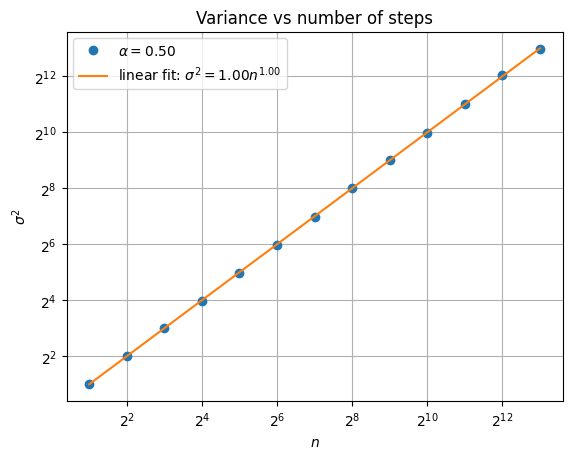

In [96]:
n_val0 = [2**i for i in range(1, 14)]
var_val0 = [variance(monte_carlo(10000,i,0.5)[0]) for i in n_val0]

m0,b0 = plot_var(n_val0, var_val0,0.5)

In [97]:
print(m0/2)

0.4999869134268685


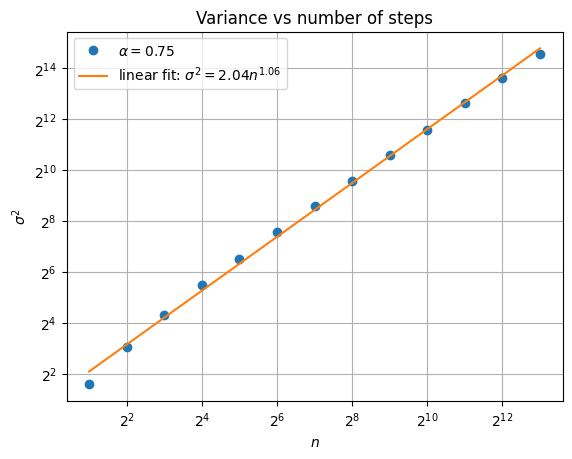

In [98]:
n_val1 = [2**i for i in range(1, 14)]
var_val1 = [variance(monte_carlo(10000,i,0.75)[0]) for i in n_val1]

m1,b1 = plot_var(n_val1, var_val1,0.75)

In [99]:
print(m1/2)

0.528734139155037


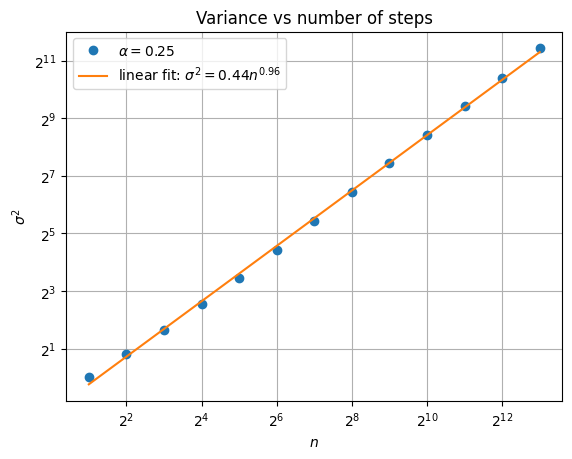

In [100]:
n_val2 = [2**i for i in range(1, 14)]
var_val2 = [variance(monte_carlo(10000,i,0.25)[0]) for i in n_val2]

m2,b2 = plot_var(n_val2, var_val2, 0.25)

In [101]:
print(m2/2)

0.48047545478239373


The plots indicate that the assumed relation is true and that the value of $\alpha$ affects the value of $\nu$.
For $\alpha = 0.5 $ ,$\nu $ also takes on a value close to 0.5.
 A higher $\alpha$-value results in a higher value of $\nu$ and vice versa.

Antother intersting property of random walks is the diffusion constant $D$

$ D =  \frac{1}{2d} \lim_{N \to \infty} \frac{\Delta x^2}{N}$

The function plot_dif is used to plot the values of the diffusion constant as a function of the number of steps.

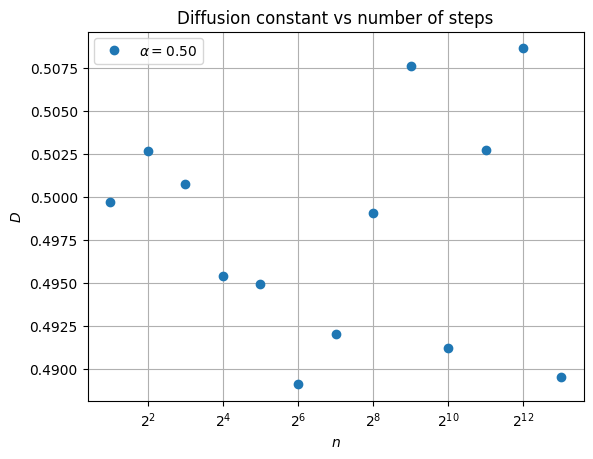

In [103]:
def plot_dif(n_val, D_val, alpha):
    plt.grid()
    plt.title('Diffusion constant vs number of steps')
    plt.xlabel('$n$')
    plt.ylabel('$D$')
    plt.xscale('log', base=2)
    plt.plot(n_val, D_val, 'o', label=r'$\alpha = {%.2f}$' % alpha)
    plt.legend()

D_val0 = [(var_val0[i]/n_val0[i])*0.5 for i in range(len(n_val0))]

plot_dif(n_val0, D_val0, 0.5)

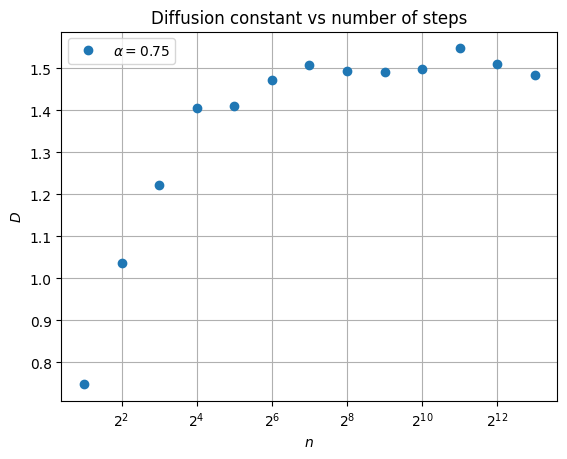

In [104]:
D_val1 = [0.5*var_val1[i]/n_val1[i] for i in range(len(n_val1))]

plot_dif(n_val1, D_val1,0.75)

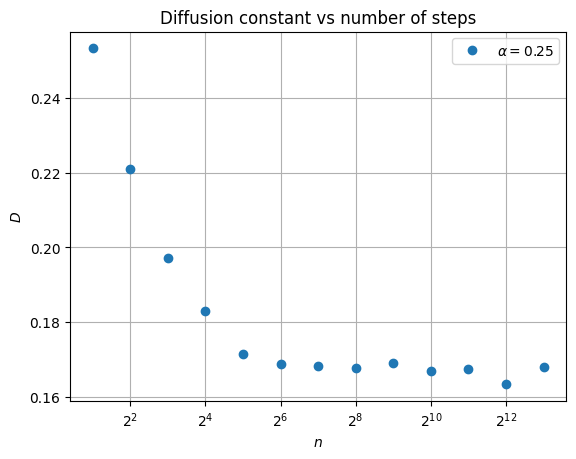

In [105]:
D_val2 = [0.5*var_val2[i]/ n_val2[i] for i in range(len(n_val2))]
plot_dif(n_val2, D_val2,0.25)


Looking at the diffusion constant one can see that it is very close to 0.5 for an $\alpha$-value of 0.5. It does not seem to converge.
For the value of 0.75 the Diffusion constant converges to approximately 1.5 which is much larger than the value of 0.17 to which it seems to converge for the value of 0.25. 
The ordering of the values is to be expected. The larger the $\alpha$-value the more likely the walker is to go in the same direction as it did on the previous step. Therefore it is more likely to have longer "sub-walks" in the same direction and deviate more from the start. 
The variance is larger and therefore the diffusion constant is too.
If the value is bellow 0.5 the walker is more likely to turn back at every step and therfore does not deviate as much from its starting position.